### **📊3Cycle**

In [1]:
import pandas as pd

a_df = pd.read_csv("./datasets/agricultural_yield_train.csv")

In [2]:
pre_a3_df = a_df.copy()

In [3]:
pre_a3_df = pre_a3_df.drop(labels=['Rainfall_mm'], axis=1).reset_index(drop=True)

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_a3_df.iloc[:, :-1], pre_a3_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [6]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 5077.0234, RMSE: 71.2532, MSLE: 0.0143, RMSLE: 0.1194, R2: 0.8788


In [7]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_a3_df.iloc[:, :-1], pre_a3_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=0)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [8]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 5027.2385, RMSE: 70.9030, MSLE: 0.0142, RMSLE: 0.1191, R2: 0.8801


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_a3_df.iloc[:, :-1], pre_a3_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 10405.7859, RMSE: 102.0088, MSLE: 0.0308, RMSLE: 0.1754, R2: 0.7516
RandomForestRegressor
MSE: 5846.5818, RMSE: 76.4629, MSLE: 0.0167, RMSLE: 0.1294, R2: 0.8604
GradientBoostingRegressor
MSE: 5201.7365, RMSE: 72.1231, MSLE: 0.0148, RMSLE: 0.1217, R2: 0.8758
XGBRegressor
MSE: 5621.1456, RMSE: 74.9743, MSLE: 0.0158, RMSLE: 0.1258, R2: 0.8658
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 5
[LightGBM] [Info] Start training from score 713.341460
LGBMRegressor
MSE: 5295.4272, RMSE: 72.7697, MSLE: 0.0149, RMSLE: 0.1223, R2: 0.8736


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [12]:
get_vif(features)

,vif_score,feature
0,22.228572,Soil_Quality
1,3.296329,Seed_Variety
2,6.638502,Fertilizer_Amount_kg_per_hectare
3,29.151255,Sunny_Days
4,5.896765,Irrigation_Schedule


In [13]:
pre_a4_df = pre_a3_df.drop(labels=['Sunny_Days'], axis=1).reset_index(drop=True)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_a4_df.iloc[:, :-1], pre_a4_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [15]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 5401.9247, RMSE: 73.4978, MSLE: 0.0150, RMSLE: 0.1224, R2: 0.8710


In [16]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_a4_df.iloc[:, :-1], pre_a4_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=0)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [17]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 5420.9864, RMSE: 73.6273, MSLE: 0.0153, RMSLE: 0.1238, R2: 0.8707


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_a4_df.iloc[:, :-1], pre_a4_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 11172.5546, RMSE: 105.7003, MSLE: 0.0305, RMSLE: 0.1746, R2: 0.7333
RandomForestRegressor
MSE: 6507.0297, RMSE: 80.6662, MSLE: 0.0181, RMSLE: 0.1344, R2: 0.8447
GradientBoostingRegressor
MSE: 5522.8960, RMSE: 74.3162, MSLE: 0.0155, RMSLE: 0.1246, R2: 0.8682
XGBRegressor
MSE: 6045.7488, RMSE: 77.7544, MSLE: 0.0169, RMSLE: 0.1300, R2: 0.8557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 4
[LightGBM] [Info] Start training from score 713.341460
LGBMRegressor
MSE: 5597.5747, RMSE: 74.8169, MSLE: 0.0157, RMSLE: 0.1254, R2: 0.8664


In [19]:
get_vif(features)

,vif_score,feature
0,9.645108,Soil_Quality
1,3.156111,Seed_Variety
2,5.913248,Fertilizer_Amount_kg_per_hectare
3,5.381059,Irrigation_Schedule


In [20]:
from statsmodels.api import OLS

features, targets = pre_a4_df.iloc[:, :-1], pre_a4_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                  OLS Regression Results                                 
Dep. Variable:     Yield_kg_per_hectare   R-squared (uncentered):                   0.990
Model:                              OLS   Adj. R-squared (uncentered):              0.990
Method:                   Least Squares   F-statistic:                          3.984e+05
Date:                  Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                          13:03:01   Log-Likelihood:                         -91563.
No. Observations:                 16000   AIC:                                  1.831e+05
Df Residuals:                     15996   BIC:                                  1.832e+05
Df Model:                             4                                                  
Covariance Type:              nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]

<Axes: >

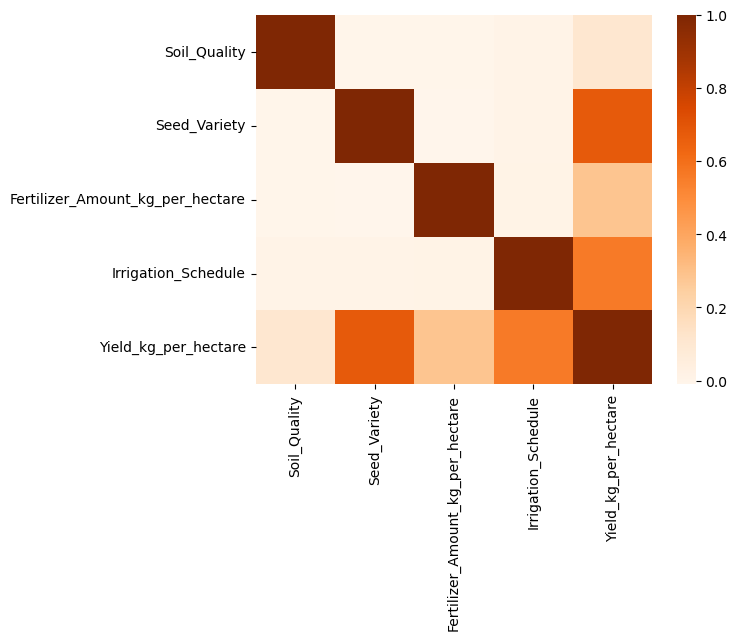

In [21]:
import seaborn as sns

# 히트맵을 통해 상관관계 확인
sns.heatmap(pre_a4_df.corr(), cmap='Oranges')

In [22]:
pre_a4_df.corr()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Irrigation_Schedule,Yield_kg_per_hectare
Soil_Quality,1.000000,-0.002753,-0.002465,0.006665,0.109346
Seed_Variety,-0.002753,1.000000,-0.010290,0.007099,0.680197
Fertilizer_Amount_kg_per_hectare,-0.002465,-0.010290,1.000000,0.010048,0.284841
Irrigation_Schedule,0.006665,0.007099,0.010048,1.000000,0.561456
Yield_kg_per_hectare,0.109346,0.680197,0.284841,0.561456,1.000000


In [23]:
# 상관관계 확인
pre_a4_df.corr()['Yield_kg_per_hectare'].sort_values(ascending=False)[1:]

Seed_Variety                        0.680197
Irrigation_Schedule                 0.561456
Fertilizer_Amount_kg_per_hectare    0.284841
Soil_Quality                        0.109346
Name: Yield_kg_per_hectare, dtype: float64

In [24]:
# 과적합 여부 확인하기
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

features, targets = pre_a4_df.iloc[:, :-1], pre_a4_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=124)
score = cross_val_score(l_r, X_train, y_train, cv=kfold, scoring='r2')
print(score)
print(np.round(np.mean(score), 4))

[0.86931668 0.8587902  0.8684785  0.86492255 0.86215707 0.85837473
 0.86558382 0.87568671 0.86228399 0.8609742 ]
0.8647


In [25]:
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)

In [26]:
get_evaluation(y_test, prediction)

MSE: 5401.9247, RMSE: 73.4978, MSLE: 0.0150, RMSLE: 0.1224, R2: 0.8710


In [27]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_a4_df.iloc[:, :-1], pre_a4_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train_val, X_test_val, y_train_val, y_test_val =\
    train_test_split(X_train, y_train, test_size=0.2, random_state=124)

X_train_val = torch.FloatTensor(X_train_val.values)
y_train_val = torch.FloatTensor(y_train_val.values).view(-1, 1)

X_test_val = torch.FloatTensor(X_test_val.values)
y_test_val = torch.FloatTensor(y_test_val.values).view(-1, 1)

train_losses = []
val_losses = []

W_train = torch.zeros((4, 1), requires_grad=True)
b_train = torch.zeros(1, requires_grad=True)

W_val = torch.zeros((4, 1), requires_grad=True)
b_val = torch.zeros(1, requires_grad=True)

optimizer_train = SGD([W_train, b_train], lr=1e-5)
optimizer_val = SGD([W_val, b_val], lr=1e-5)

In [28]:
# 검증 데이터를 포함하지 않는 훈련 데이터 세트 학습 수행
epochs = 1000000

for epoch in range(1, epochs + 1):
    H_train = X_train_val.matmul(W_train) + b_train
    loss_train = torch.mean((y_train_val - H_train) ** 2)

    optimizer_train.zero_grad()
    loss_train.backward()
    optimizer_train.step()

    if epoch % 100000 == 0:
        train_losses.append(loss_train.item())

    if epoch % 100000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, b: {:.4f}, loss: {:.4f}'\
            .format(epoch, epochs, W_train[0].item(), W_train[1].item(), \
                    W_train[2].item(), W_train[3].item(), b_train.item(), loss_train.item()))

100000/1000000: W1: 2.5965, W2: 109.0609, W3: 0.8882, W4: 54.3944, b: 10.3578, loss: 13612.6299
200000/1000000: W1: 2.1085, W2: 177.6599, W3: 0.8486, W4: 52.7491, b: 15.5277, loss: 8796.8457
300000/1000000: W1: 1.8014, W2: 221.3224, W3: 0.8237, W4: 51.7221, b: 18.3895, loss: 6848.2397
400000/1000000: W1: 1.6102, W2: 249.1384, W3: 0.8083, W4: 51.0664, b: 19.8027, loss: 6058.9448
500000/1000000: W1: 1.4916, W2: 266.9222, W3: 0.7988, W4: 50.6576, b: 20.3094, loss: 5738.1514
600000/1000000: W1: 1.4208, W2: 278.0250, W3: 0.7931, W4: 50.4126, b: 20.2686, loss: 5610.1743
700000/1000000: W1: 1.3779, W2: 285.1703, W3: 0.7898, W4: 50.2717, b: 19.9055, loss: 5556.9116
800000/1000000: W1: 1.3543, W2: 289.6322, W3: 0.7880, W4: 50.1926, b: 19.3332, loss: 5534.9658
900000/1000000: W1: 1.3409, W2: 292.6840, W3: 0.7870, W4: 50.1460, b: 18.6518, loss: 5524.7949
1000000/1000000: W1: 1.3336, W2: 294.9384, W3: 0.7865, W4: 50.1134, b: 17.8888, loss: 5519.6831


In [29]:
# 검증 데이터 세트 학습 수행
epochs = 1000000

for epoch in range(1, epochs + 1):
    H_test = X_test_val.matmul(W_val) + b_val
    loss_test = torch.mean((y_test_val - H_test) ** 2)

    optimizer_val.zero_grad()
    loss_test.backward()
    optimizer_val.step()

    if epoch % 1000 == 0:
        val_losses.append(loss_test.item())
        
    if epoch % 100000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, b: {:.4f}, loss: {:.4f}'\
            .format(epoch, epochs, W_val[0].item(), W_val[1].item(), \
                    W_val[2].item(), W_val[3].item(), b_val.item(), loss_test.item()))

100000/1000000: W1: 2.8223, W2: 105.0885, W3: 0.9012, W4: 51.6947, b: 8.7636, loss: 13318.1357
200000/1000000: W1: 2.3185, W2: 172.3271, W3: 0.8604, W4: 50.5881, b: 12.9227, loss: 8705.1768
300000/1000000: W1: 1.9992, W2: 215.7133, W3: 0.8346, W4: 49.8765, b: 15.0477, loss: 6787.4873
400000/1000000: W1: 1.7973, W2: 243.7178, W3: 0.8184, W4: 49.4442, b: 15.8859, loss: 5989.6616
500000/1000000: W1: 1.6733, W2: 261.7122, W3: 0.8085, W4: 49.1588, b: 15.9295, loss: 5658.3789
600000/1000000: W1: 1.5969, W2: 273.3052, W3: 0.8025, W4: 49.0034, b: 15.4802, loss: 5519.5298
700000/1000000: W1: 1.5518, W2: 280.7964, W3: 0.7990, W4: 48.9146, b: 14.7318, loss: 5460.4297
800000/1000000: W1: 1.5260, W2: 285.7196, W3: 0.7971, W4: 48.8671, b: 13.8156, loss: 5434.3188
900000/1000000: W1: 1.5139, W2: 288.7714, W3: 0.7962, W4: 48.8481, b: 12.8324, loss: 5422.8838
1000000/1000000: W1: 1.5031, W2: 291.7238, W3: 0.7955, W4: 48.8315, b: 11.7833, loss: 5415.4375


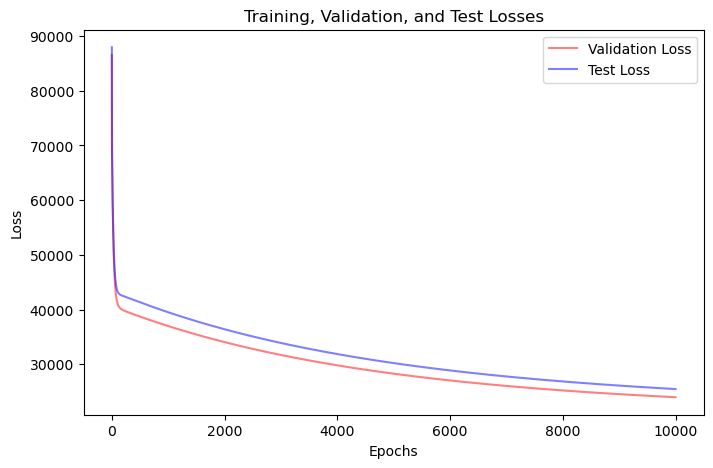

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.nn import Linear, Module
from torch.optim import SGD
import pandas as pd
from sklearn.model_selection import train_test_split

features, targets = pre_a4_df.iloc[:, :-1], pre_a4_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
    train_test_split(features, targets, test_size=0.2, random_state=124)

X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=124)

# 데이터를 Tensor로 변환
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)
X_val = torch.FloatTensor(X_val.values)
y_val = torch.FloatTensor(y_val.values).view(-1, 1)

# 모델 정의
class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(4, 1)

    def forward(self, x):
        return self.linear(x)

# 모델 생성
model = LinearRegressionModel()

# 손실 함수와 최적화 함수 정의
mse_loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-5)

# 훈련, 검증, 테스트 루프
num_epochs = 10000
train_losses, val_losses, test_losses = [], [], []

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    train_H = model(X_train)
    train_loss = mse_loss(train_H, y_train)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_H = model(X_val)
        val_loss = mse_loss(val_H, y_val)
        val_losses.append(val_loss.item())

    # Testing
    model.eval()
    with torch.no_grad():
        test_H = model(X_test)
        test_loss = mse_loss(test_H, y_test)
        test_losses.append(test_loss.item())

# 손실 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(val_losses, label='Validation Loss', color='red', alpha=0.5)
plt.plot(test_losses, label='Test Loss', color='blue', alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Losses')
plt.legend()
plt.show()

MSE: 5509.0830, RMSE: 74.2232, MSLE: 0.0160, RMSLE: 0.1265, R2: 0.8651


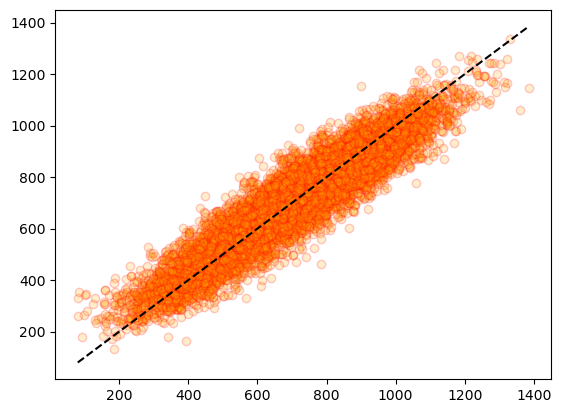

In [31]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 5402.6367, RMSE: 73.5026, MSLE: 0.0150, RMSLE: 0.1224, R2: 0.8710


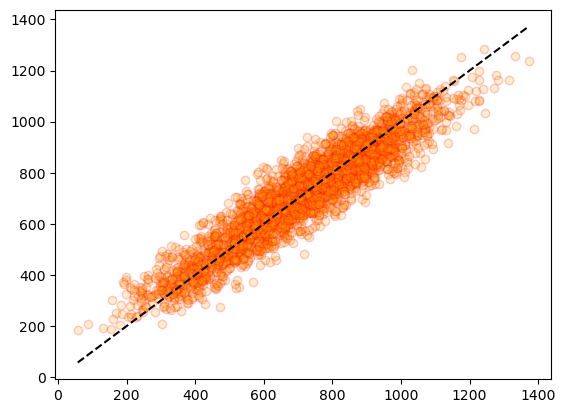

In [32]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

### **📌결론**